# Week 1 Inroduction

This is an unassessed coursework to help you learn some key Python features that you will undoubtedly need at some point during this module.
For those of you who haven't used Python before please work through [Intro-to-Python](https://gitlab.erc.monash.edu.au/andrease/Python4Maths/-/tree/master/Intro-to-Python) gitlab notebooks they provide excellent introduction to Python.
From 00-07 will be more than sufficient to get you used to Python and of course it will be better if you did more.
And for those who have previous Python experience feel free to skip them.

This coursework should be worked on during the scheduled tutorial sessions where you can ask questions if you get stuck.

In [1]:
# %matplotlib inline is a magic function for displaying the image in the notebook
%matplotlib inline
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

## Task 1. Basic loading and displaying
In this task you will learn how to load, display and convert to gray scale RGB images.
### 1.1 Display image
Download a color image and place it in the images' folder if you like or use the images already there.
Now load the image and display it but be careful as different loading functions can represent images in a different datatype or different channels order.

`Hint 1: images in python can be though of as a multidimentional array`
`Hint 2: Use OpenCV to load the image`

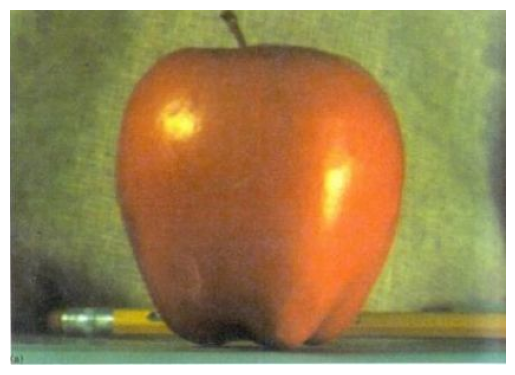

In [5]:
# fill in missing part
img = mpimg.imread('../images/apple1.jpg') # replace this code and load your image
plt.imshow(img)
plt.axis('off')  # Optional: Turn off the axis for a cleaner display
plt.show()

# display the image (Hint: use plt.imshow)


Play a bit with the image and understand how the images are represented in Python for example try:
- Printing the shape
- Try accessing image channels
- Display each channel separately
- Swap the channels and display the image

Did you notice any differences when you swapped the channels? or visualized only one channel ata time?

Image shape: (301, 420, 3)
[[[102 164 150]
  [102 164 150]
  [ 98 163 148]
  ...
  [132 171 163]
  [130 169 161]
  [130 169 161]]

 [[ 99 161 147]
  [ 99 161 147]
  [ 99 161 147]
  ...
  [131 170 162]
  [129 168 160]
  [128 167 159]]

 [[ 95 156 142]
  [ 95 157 143]
  [ 95 157 143]
  ...
  [128 168 157]
  [126 166 155]
  [126 166 155]]

 ...

 [[210 221 211]
  [138 150 138]
  [139 152 136]
  ...
  [169 177 140]
  [166 173 138]
  [164 172 135]]

 [[214 223 213]
  [153 165 153]
  [152 162 149]
  ...
  [206 212 181]
  [205 211 180]
  [203 209 178]]

 [[246 253 246]
  [203 212 202]
  [201 209 198]
  ...
  [246 253 226]
  [245 252 225]
  [245 252 225]]]


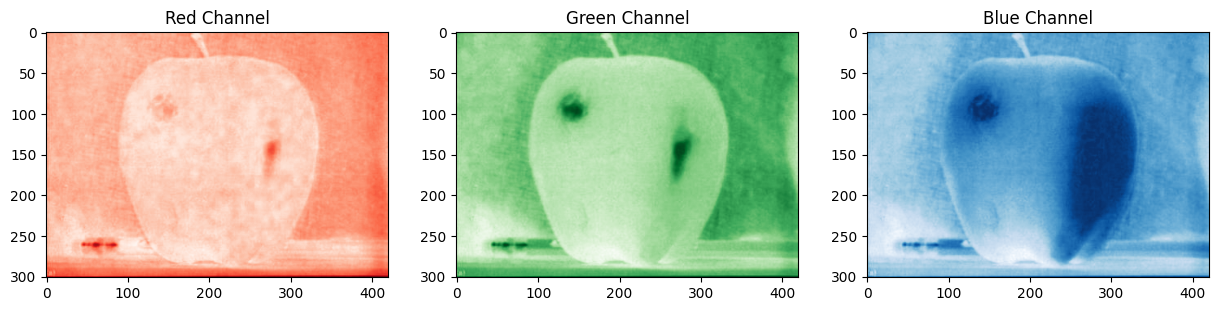

In [21]:
print("Image shape:", img.shape)
# print(img)
# Access the channels (assuming the image is RGB)
# The image array is in the format (height, width, channels), where channels = 3 for RGB
red_channel = img[:,:,0] # red channel 
green_channel = img[:,:,1] # green channel 
blue_channel = img[:,:,2] # blue channel 

# Display the channel seperately 
fig, ax = plt.subplots(1,3, figsize=(15,5))

ax[0].imshow(red_channel, cmap='Reds')
ax[0].set_title('Red Channel')

ax[1].imshow(green_channel, cmap='Greens')
ax[1].set_title('Green Channel')

ax[2].imshow(blue_channel, cmap='Blues')
ax[2].set_title('Blue Channel')

plt.show()
# Play with the images here 

### 1.2 Convert to gray scale
`Hint: try using cvtColor from openCV packge`

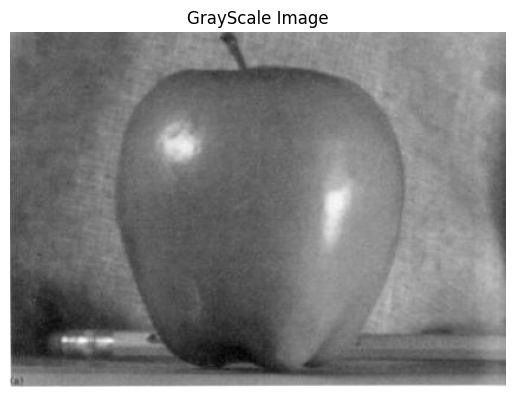

In [18]:
img = cv2.imread("../images/apple1.jpg")

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# replace this code and load your image

plt.imshow(gray_img, cmap='gray')
plt.axis('off') # hide axis 
plt.title('GrayScale Image') 
plt.show()

# display the image (Hint: use plt.imshow)

Try writing your oen method to convert RGB images to gray scale.

In [19]:
def to_gray(img):
    '''
    Convert and RGB image into gray scale
    :param img: RBG image with size HxWx3
    :return: gray scaled image of size HxW
    '''
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    gray_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2] # Modify this part to convert the image onto gray scale

    assert gray_img.shape == (h,w), 'Wrong spacial dimensions, your method should only change the channel dimension'
    return gray_img

In [20]:
to_gray(img)

array([[143.866, 143.866, 141.855, ..., 158.427, 156.427, 156.427],
       [140.866, 140.866, 140.866, ..., 157.427, 155.427, 154.427],
       [136.165, 136.866, 136.866, ..., 154.786, 152.786, 152.786],
       ...,
       [216.571, 145.044, 146.289, ..., 170.39 , 166.917, 165.39 ],
       [219.169, 160.044, 157.528, ..., 206.672, 205.672, 203.672],
       [250.109, 208.169, 205.354, ..., 247.829, 246.829, 246.829]])

## More advanced basics
Now we have learned how to load and display images, and we have some information about how Python represent images we can do more advance image manipulations.

### 2.1 Transpose
Flip the image across its diagonal.

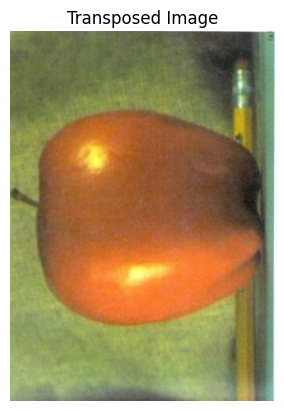

In [27]:
img = mpimg.imread("../images/apple1.jpg")
transposed_img = np.transpose(img, (1,0,2)) # (H,W,C) -> (W,H,C) transpose the height and width dimensions, but keep color channels intact

plt.imshow(transposed_img)# replace this code and load your image
plt.axis('off')
plt.title('Transposed Image')
plt.show()

# display the transposed_img (Hint: use plt.imshow)

### 2.2 Split the image
Split the image into four equal parts and display each of them.
You can display each of them separately or preferably in a single plot using `subplots`.

`Hint: Do not use for loop, try NumPy array slicing. Be carefull of the coordinate system!`

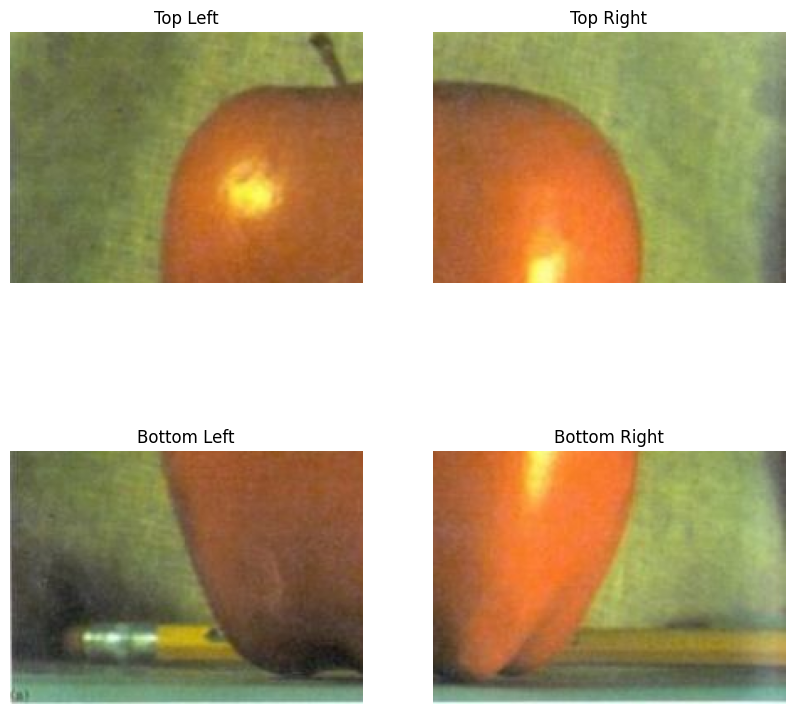

In [31]:
height, width, channels = img.shape

mid_height = height // 2
mid_width = width // 2

top_left = img[:mid_height, :mid_width, :]
top_right = img[:mid_height, mid_width:, :]
bottom_left = img[mid_height:, :mid_width, :]
bottom_right = img[mid_height:, mid_width:, :]



# Create a subplot with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Display each part of the image in the subplots
ax[0, 0].imshow(top_left)
ax[0, 0].set_title('Top Left')
ax[0, 0].axis('off')  # Hide axes for cleaner look

ax[0, 1].imshow(top_right)
ax[0, 1].set_title('Top Right')
ax[0, 1].axis('off')

ax[1, 0].imshow(bottom_left)
ax[1, 0].set_title('Bottom Left')
ax[1, 0].axis('off')

ax[1, 1].imshow(bottom_right)
ax[1, 1].set_title('Bottom Right')
ax[1, 1].axis('off')

# Show the plot with all four parts
plt.show()

# display all parts

## Scaling and loops
Use openCV python routines to scale down the image and plot them side by side with the full scaled image.
Write your own function to scale down the image using an average of 4 pixels.

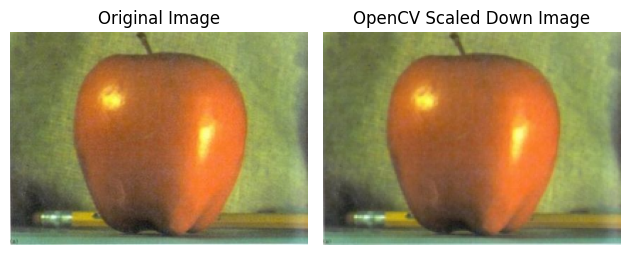

In [52]:
img = cv2.imread("../images/apple1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


# Use OpenCV to scale down the image by a factor of 2
scaled_img = cv2.resize(img, (img.shape[1] // 2, img.shape[0] // 2), interpolation=cv2.INTER_AREA)
# scaled_img = average_scale_down(img)

# Create a subplot with two images (original and scaled down)
fig, axes = plt.subplots(1,2)

# Display original image
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display scaled down image
axes[1].imshow(scaled_img)
axes[1].set_title('OpenCV Scaled Down Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [47]:
def average_scale_down(img):
    '''
    Scale down and RGB image
    :param img: RBG image with size HxWx3
    :return: scaled_img: RBG scaled down image with size (H/4)x(W/4)x3
    '''
    
    assert len(img.shape) == 3, f'Wrong input image dimensions, we expected an input of size HxWxC instead we got {img.shape}'
    h,w,c = img.shape
    
    h = h - h % 2 
    w = w - w % 2
    
    scaled_img = np.zeros((h//2, w//2,c), dtype=img.dtype) # Modify this part to convert the image onto gray scale
    
    # Loop through the image and average 
    for i in range(0, h, 2):
        for j in range(0, w, 2):
            scaled_img[i // 2, j // 2] = np.mean(img[i:i+2, j:j+2], axis=(0, 1))


    
    assert scaled_img.shape == (h//2,w//2, 3), f'Wrong spacial dimensions, your method should reduce the spacial dimensions by a factor of four we expect {(h//2,w//2, 3)} instead we have {scaled_img.shape}'
    return scaled_img

Similarly, how can you double the size of an image?
What sort of artefacts are visible if you do so?
Try and code this out yourself.

### Advanced
Nested loops can take a lot of time you may already noticed, rewrite your scale down function without using loops.